# Prendre en main l'API Python d'ArcGIS - épisode 2
## Gestion des crédits dans ArcGIS Online

### 1/ Connexion au GIS

In [ ]:
from arcgis.gis import GIS
gis = GIS("home")

### 2/ Vérifier le nombre de crédits de l'organisation

Dans un premier temps, nous allons vérifier le nombre total de crédits que possède notre organisation.   
Pour cela, nous pouvons utiliser un extrait de code mis à disposition par Esri dans l'interface ArcGIS Notebooks : *Extraits de code > Organisé par Esri > GIS Administration Code Snippets > Check remaining credits* :  
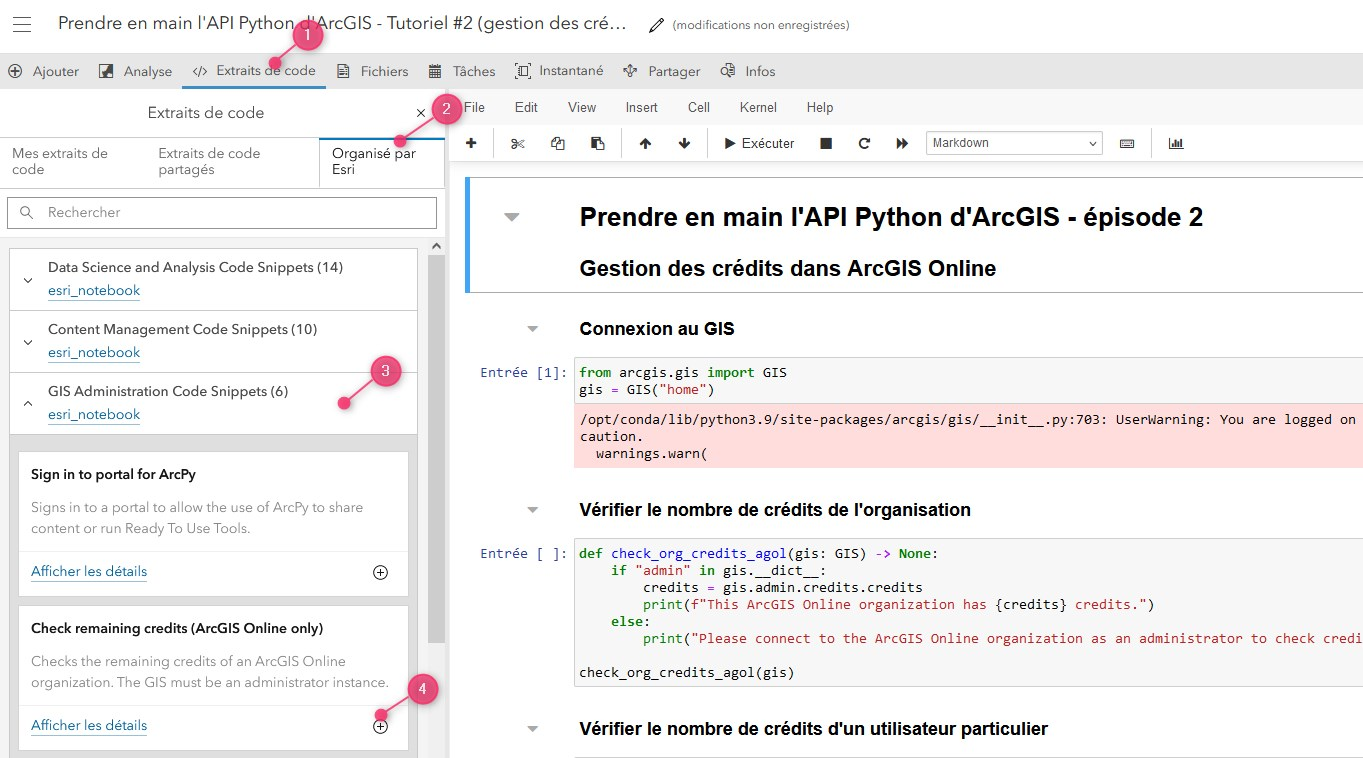

In [ ]:
from arcgis.gis import GIS

def check_org_credits_agol(gis: GIS) -> None:
    if "admin" in gis.__dict__:
        credits = gis.admin.credits.credits
        print(f"This ArcGIS Online organization has {credits} credits.")
    else:
        print("Please connect to the ArcGIS Online organization as an administrator to check credits.")

# check_org_credits_agol(GIS)

Si vous exécutez la cellule telle quelle, vous constatez que rien ne se passe. Il va falloir lui apporter quelques petites modifications.  
+ Premièrement, nous avons déjà fait l'import du GIS. Nous pouvons donc supprimer la ligne `from arcgis.gis import GIS`.  
+ Ensuite, nous allons nous pencher sur comment est construit le reste de la cellule. Il y a deux grosses parties : la **définition de la fonction** `def check_org_credits_agol(gis: GIS) -> None:`. Tout ce qui suit ensuite dans le bloc indenté explique ce que doit faire la fonction, que j'ai commenté ligne par ligne dans la cellule ci-dessous. La seconde partie `check_org_credits_agol(GIS)` est **l'appel de la fonction**. C'est ce qui permet de lancer l'exécution de la fonction. Ici, l'appel de la fonction est en commentaire (`#`). Pour que la fonction s'exécute, il faut décommenter la ligne en supprimant le croisillon.
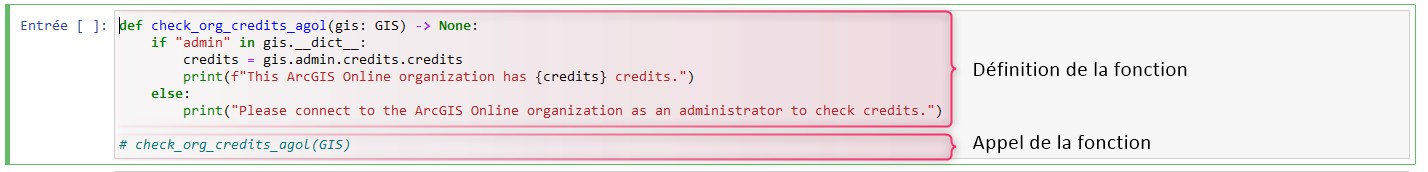
+ Enfin, notre connexion au GIS a été stockée dans la variable `gis` tout en minuscule (dans la toute première cellule du Notebook). L'argument que nous devons passer à la fonction lorsque nous l'appelons est donc `gis` en minuscule : `check_org_credits_agol(gis)`
Voici ce à quoi devrait maintenant ressembler votre cellule : 

In [ ]:
def check_org_credits_agol(gis: GIS) -> None: #déclaration de la fonction. 
    #Dans les parenthèses, nous pouvons indiquer des paramètres, càd les variables que la fonction recevra lorsqu'elle sera appelée et qui pourront servir lors de son exécution.
    #Ici, nous aurons besoin d'un paramètre gis de type GIS (https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#gis)
    # -> None signifie que la fonction ne retournera rien (il n'y a pas de déclaration return() contenant une valeur dans cette fonction.)
    
    if "admin" in gis.__dict__: #vérifie que l'utilisateur connecté a des privilèges administrateur (nécessaires pour travailler avec les crédits)
        credits = gis.admin.credits.credits #vérifie le nombre de crédits avec le paramètre credits 
        print(f"This ArcGIS Online organization has {credits} credits.")#imprime le résultat
    else:
        print("Please connect to the ArcGIS Online organization as an administrator to check credits.")#si l'utilisateur connecté n'est pas admin, la fonction indique qu'il faut se connecter en tant qu'admin.

check_org_credits_agol(gis) #appel de la fonction pour l'exécuter. Nous passons en argument la variable gis qui contient notre connexion à l'organisation

Vous pouvez l'exécuter pour obtenir le nombre de crédits disponibles dans votre organisation.

En utilisant l'interface ArcGIS Notebooks, vous avez accès à plusieurs extraits de code proposés par Esri : des scripts pour l'**administration du SIG** comme ce que nous venons d'utiliser, mais aussi pour le **management de contenu** et pour exécuter des workflows de **data science et d'analyse spatiale**. Ils vous permettent de faire appel à des capacités de l'API de manière très simple avec du code déjà prêt à l'emploi, sur lequel seules quelques modifications mineures sont nécessaires.  
Vous pouvez également enregistrer vos propres extraits de code pour les réutiliser à travers vos différents Notebooks, et les partager dans votre organisation pour que d'autres personnes puissent également en bénéficier.

### 3/ Inspecter les opérations ayant consommé des crédits dans l'année écoulée

Maintenant que l'on sait combien de crédits sont disponibles dans l'organisation, on peut se demander dans quelles opérations ont consommé le plus de crédits.  
Pour cela, nous allons utiliser la fonction `report()` de la classe [`User`](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#user).  
Cette fonction permet de générer différents rapports sur l'entièreté de l'organisation. Ici, nous allons utiliser un rapport sur les crédits (en définissant l'argument `report_type` sur credits), mais la même fonction est capable de générer des rapports sur le contenu, les utilisateurs, etc. Nous ne testerons pas tout ici, mais je vous conseille de le découvrir par vous-même 👀  
La fonction demande également un argument `start_time`, pour lequel nous allons récupérer le premier jour du mois en cours, et une durée `duration`, pour laquelle nous allons demander un rapport mensuel ("monthly").

Le module [datetime](https://docs.python.org/fr/3/library/datetime.html) permet de récupérer la date du jour avec sa fonction `datetime.now()`, puis le nous récupérons le premier jour du mois en remplaçant le jour actuel par 1 grâce à une fonction classique en python, `replace()`. Nous les stockons dans les variables `ajdh` et `premier_jour_mois` :

In [ ]:
import datetime

ajdh = datetime.datetime.now() #jour actuel
premier_jour_mois = ajdh.replace(day=1) #premier jour du mois

Nous pouvons ensuite appeler la fonction `report()`, en indiquant que nous voulons un rapport sur les crédits, en indiquant que la date de début est le premier jour du mois (récupérée ci-dessus) et que l'on veut un rapport mensuel :

In [ ]:
credit_report = gis.users.me.report(report_type = "credits", start_time = premier_jour_mois, duration = "monthly")
credit_report

Si vous allez voir l'item créé, vous pouvez récupérer un fichier CSV, vous indiquant pour chaque utilisateur et indiquant le nombre de crédit consommé par chacun pour chaque opération.  
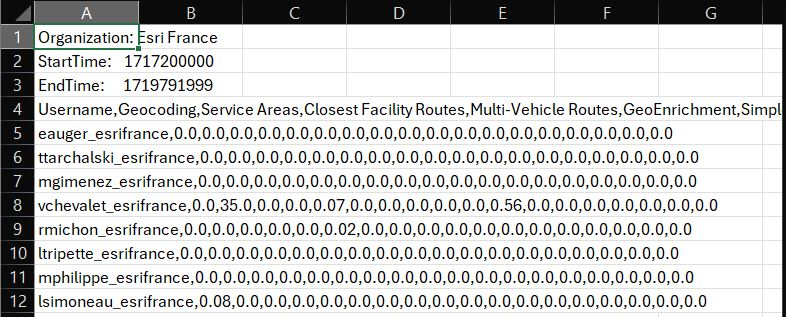
Pas très lisible en tant que tel... Mais nous pouvons en tirer plein d'informations, au global pour l'organisation ou utilisateur par utilisateur !
Ici, nous allons transformer cet item CSV en dataframe pandas (comme nous avons pu le faire la semaine dernière); puis faire quelques opérations sur celui-ci pour obtenir uniquement la totalité des crédits consommés par tous les utilisateurs de l'organisation pour chaque type d'opération, classés par ordre décroissant de consommation :

In [ ]:
import pandas as pd 

#récupération de l'item créé
file1 = credit_report.get_data()
#chargement des données du fichier CSV en ignorant les 3 premières lignes
df_credits = pd.read_csv(file1, skiprows=3)
#transpose le dataframe et ignore la première ligne pour conserver uniquement les lignes nécessaires
transposed_df = df_credits.T.iloc[1:, :]
#calcule la somme des valeurs de chaque ligne et ajoute une colonne 'Total'
transposed_df['Total'] = transposed_df.sum(axis=1)
#réinitialise l'index pour convertir l'index actuel en une colonne
transposed_df.reset_index(inplace=True)
#sélectionne uniquement les colonnes 'index' et 'Total' pour le dataframe final
credits_report_df = transposed_df[['index', 'Total']]
#classe le dataframe final par ordre croissant de la colonne 'Total'
credits_report_df = credits_report_df.sort_values(by='Total', ascending=False)
#affiche le dataframe final
credits_report_df

### 4/ Vérifier le nombre de crédits d'un utilisateur particulier

Comme tout à l'heure, nous allons utiliser un extrait de code mis à disposition par Esri, cette fois-ci *Check the credits of a specific user*, qui nous permettra de savoir les crédits restants d'un utilisateur spécifique :
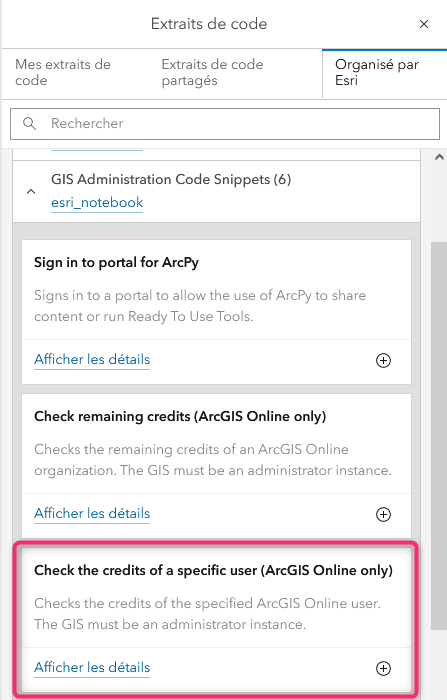

*Notez que pour faire fonctionner cette fonction, il faut que les outils de budgétisation des crédits soient activés sur votre organisation. Vous pouvez le vérifier en suivant [cette aide en ligne](https://doc.arcgis.com/fr/arcgis-online/administer/configure-credits.htm), ou bien en utilisant la fonction `enable()` de la classe [`CreditManager`](https://doc.arcgis.com/fr/arcgis-online/administer/configure-credits.htm)*

In [ ]:
from arcgis.gis import GIS

def check_user_credits_agol(gis: GIS, username: str) -> None:
    if "admin" in gis.__dict__:
        users = gis.users.search(username)
        if users:
            user = users[0]
            username_result = user.username
            if gis.admin.credits.is_enabled:
                assigned = user.assignedCredits
                available = user.availableCredits
                print(f"User [{username_result}] has {assigned} assigned credits and {available} available credits.")
            else:
                credits = gis.admin.credits.credits
                print(f"This ArcGIS Online organization has disabled credit budgeting tools. The total remaining credits are: {credits}.")
        else:
            print(f"Did not find user [{username}].")
    else:
        print("Please connect to the ArcGIS Online organization as an administrator to check credits.")

# check_user_credits_agol(GIS, USERNAME)

A nouveau, nous allons apporter quelques modifications à la fonction :
+ supprimer l'import du GIS en première ligne ;
+ décommenter l'appel de la fonction ;
+ passer en paramètre de la fonction :
   + gis en minuscule pour la connexion au GIS
   + le nom de l'utilisateur duquel vous souhaitez récupérer les crédits à la place de username, par exemple : "nom_prénom_org" (les "" sont importants car la fonction attend une chaîne de caractères). Ici, à la place de rentrer en dur un nom d'utilisateur, j'utilise `gis.users.me` qui permet de récupérer l'utilisateur connecté, puis j'accède à sa propriété `username` : `gis.user.me.username` ; cela me permet d'injecter dans la fonction le nom de l'utilisateur actuellement authentifié.
   
Votre fonction modfiée devrait ressembler à celle dans la cellule ci-dessous. Vous trouverez des commentaires ligne par ligne pour comprendre son fonctionnement :

In [ ]:
def check_user_credits_agol(gis: GIS, username: str) -> None: 
    if "admin" in gis.__dict__: #vérifie que l'utilisateur connecté a des privilèges administrateurs
        users = gis.users.search(username) #recherche le nom d'utilisateur passé en argument de la fonction dans l'org
        if users: #vérifie qu'il trouve bien un ou plusieurs utilisateur dont le nom correspond au nom d'utilisateur entré en argument
            user = users[0] #récupère le premier utilisateur de la liste retournée par le search()
            username_result = user.username #accède à la propriété username de l'utilisateur
            if gis.admin.credits.is_enabled: #vérifie que la budgétisation des crédits est activée sur l'org
                assigned = user.assignedCredits #accède à la propriété assignedCredits de l'utilisateur qui donne le nombre de crédits assignés
                available = user.availableCredits #accède à la propriété availableCreditss de l'utilisateur qui donne le nombre de crédits restants
                print(f"User [{username_result}] has {assigned} assigned credits and {available} available credits.") #imprime le nombre de crédits assignés et le nombre de crédits restants
            else: #si les outils de budgétisation des crédits ne sont pas activés pour l'org, imprimera le nombre de crédits disponibles pour toute l'org
                credits = gis.admin.credits.credits
                print(f"This ArcGIS Online organization has disabled credit budgeting tools. The total remaining credits are: {credits}.") 
        else: #si aucun utilisateur avec le nom indiqué n'est trouvé, prévient qu'il n'a pas été trouvé
            print(f"Did not find user [{username}].")
    else: #si l'utilisateur connecté exécutant le notebook n'est pas admin, indique qu'il faut une connexion admin
        print("Please connect to the ArcGIS Online organization as an administrator to check credits.")

check_user_credits_agol(gis, gis.users.me.username) #appel de la fonction

### 5/ Vérifier si un utilisateur a presque consommé tous ses crédits et envoyer une notification d'alerte

#### Récupérer les utilisateurs avec moins de 10% et moins de 50% de crédits restants

La fonction au-dessus est très pratique, mais pas hyper efficace si utilisée telle quelle. Ce que nous allons faire, c'est itérer parmi tous les utilisateurs de l'organisation et vérifier pour chacun d'eux leurs crédits restants. Commençons par récupérer tous les utilisateurs de l'org avec la fonction `search()` de la classe [`UserManager`](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#usermanager) de l'API :

In [ ]:
utilisateurs = gis.users.search(max_users=1000)
#la limite d'utilisateur retournés (ici 1000, par défaut 100) est modifiable avec l'argument max_users
#Les réponses sont limitées à 10 000 résultats par requête
#utilisateurs

Je vais reprendre la même fonction, mais la modifier un peu :  
+ nous pouvons enlever tous les else car nous savons que nous sommes connectés en tant qu'admin, que nos outils de budgétisation des crédits sont activés et que tous les utilisateurs renvoyés par la fonction `search()` ci-dessus sont bien dans l'organisation ;
+ nous allons également retirer tous les prints ;
+ à la fin de la fonction, nous allons ajouter une instruction `return()` qui renverra les valeurs assigned et available. Cela nous permettra de nous en servir en dehors de la fonction. De ce fait, nous enlevons le `-> None` dans la déclaration de la fonction.
+ notez également que j'ai légèrement modifié le nom de la fonction pour la différencier de la précédente.

In [ ]:
def check_user_credits_agol_noprint(gis: GIS, username: str) :
    if "admin" in gis.__dict__:
        users = gis.users.search(username)
        if users:
            user = users[0]
            username_result = user.username
            if gis.admin.credits.is_enabled:
                assigned = user.assignedCredits
                available = user.availableCredits
                return(assigned,available) 

Nous allons ensuite parcourir la liste des utilisateurs de l'organisation, et utiliser la fonction ci-dessus pour récupérer leur nombre de crédits assignés et disponibles. Nous vérifions ensuite s'il reste moins de 10% puis moins de 50% des crédits disponibles. Si ça n'est pas le cas, nous ajoutons les utilisateurs à une liste.

In [ ]:
liste_10=[]
liste_50=[]

for utilisateur in utilisateurs :
    try :
        assigned,available = check_user_credits_agol_noprint(gis, utilisateur.username)
        if available < 0.10 * assigned:
            print(f"Attention: les crédits disponibles pour l'utilisateur {utilisateur.username} sont inférieurs à 10% des crédits assignés ({assigned-available}/{assigned} crédits consommés - {available} crédits restants).")
            liste_10.append(utilisateur.username)
        elif available < 0.5 * assigned:
            print(f"Les crédits disponibles pour l'utilisateur {utilisateur.username} sont inférieurs à 50% des crédits assignés ({assigned-available}/{assigned} crédits consommés - {available} crédits restants).")
            liste_50.append(utilisateur.username)
    except :
        pass

#### Envoi d'une notification aux administrateurs de l'organisation :

La propriété `admin_contacts` de la classe [`UX`](https://developers.arcgis.com/python/api-reference/arcgis.gis.admin.html#ux) de l'API nous permet d'accéder à la liste des contacts administrateur définis pour votre organisation :

In [ ]:
# Récupérer les contacts administrateurs
admin_contacts = gis.admin.ux.admin_contacts
admin_contacts

Nous pouvons ensuite utiliser la fonction `send_notification` du [`UserManager`](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.UserManager.send_notification) pour envoyer un email aux contacts administrateurs :

In [ ]:
gis.users.send_notification(admin_contacts, "Notification - utilisation des crédits de votre organisation ArcGIS Online",#titre du message
                            f"Attention: les crédits disponibles pour les utilisateurs {liste_10} sont inférieurs à 10% des crédits assignés. Notez égalempent que les crédits disponibles pour les utilisateurs {liste_50} sont inférieurs à 50% des crédits assignés.", #contenu du message
                            "email" #à retirer pour avoir une notification sur le portail
                           )

### 6/ Réassigner des crédits à un utilisateur

Si je le souhaite, je peux ensuite réallouer des crédits aux utilisateurs ayant atteint moins de 10% de crédits restants. Pour cela, j'utilise la fonction `allocate()` du [`CreditManager`](https://developers.arcgis.com/python/api-reference/arcgis.gis.admin.html#arcgis.gis.admin.CreditManager.allocate)

In [ ]:
for utilisateur in liste_10:
    gis.admin.credits.allocate(utilisateur,200)